## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2a7d3326dee660824a8433ffd01065f8ac37f7d6
python           : 3.8.5.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 19.6.0
Version          : Darwin Kernel Version 19.6.0: Thu Jun 18 20:49:00 PDT 2020; root:xnu-6153.141.1~1/RELEASE_X86_64
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.UTF-8

pandas           : 1.1.2
numpy            : 1.18.1
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.3
setuptools       : 47.1.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.18.1
pandas_datareader: None
bs4              : None
bottl

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [10]:
import pickle

# Write your code here


# hapiness = pickle.load(open(HAPPINESS_DATASET, 'rb'))
hapiness = pd.read_pickle(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


In [1]:
hapiness.head()

NameError: name 'hapiness' is not defined

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [12]:
country_features=pd.merge(countries, hapiness, left_index=True, right_index=True).drop('country', axis=1)

country_features.head(10)

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,647500,31056997,"36,0",2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,28748,3581655,"86,5",4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,2381740,32930091,"70,0",5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,2766890,39921833,"97,1",5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,29800,2976372,"98,6",4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
5,australia,7686850,20264082,"100,0",7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ
6,austria,83870,8192880,"98,0",7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe
7,azerbaijan,86600,7961619,"97,0",5.1648,0.819308,65.508400,0.786824,-0.240255,0.552538,Commonwealth of Independent States
8,bahrain,665,698585,"89,1",6.2273,0.876342,68.500000,0.905856,0.133729,0.739347,Middle East and North Africa
9,bangladesh,144000,147365352,"43,1",4.8328,0.687293,64.503067,0.900625,-0.033665,0.661844,South Asia


In [15]:
print(len(country_features));
print(len(countries));
print(len(hapiness));

135
135
135


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [7]:
# Write your code here
country_features.loc[country_features['world_region']=='East Asia']

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
24,china,9596960,1313973713,"90,9",5.1239,0.798761,69.289192,0.898518,-0.181426,0.753971,East Asia
59,japan,377835,127463611,"99,0",5.8708,0.883546,75.000969,0.809961,-0.246910,0.654558,East Asia
83,mongolia,1564116,2832224,"97,8",5.4562,0.937142,62.304485,0.693351,0.098094,0.863511,East Asia


In [8]:
country_features[['country_name','happiness_score']].sort_values(ascending=[False], 
                                           by=['happiness_score']).head(10)

,country_name,happiness_score
38,finland,7.8087
31,denmark,7.6456
115,switzerland,7.5599
50,iceland,7.5045
92,norway,7.4880
87,netherlands,7.4489
114,sweden,7.3535
88,new zealand,7.2996
6,austria,7.2942
72,luxembourg,7.2375


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [9]:
# Write your code 
country_grouped = country_features.groupby("world_region")
for world_region, group in country_grouped:
    print('world_region', world_region)
    print('group', group)

world_region Central and Eastern Europe
group        country_name    area  population literacy  happiness_score  \
1           albania   28748     3581655     86,5           4.8827   
16         bulgaria  110910     7385367     98,6           5.1015   
28          croatia   56542     4494749     98,5           5.5047   
30   czech republic   78866    10235455     99,9           6.9109   
36          estonia   45226     1324333     99,8           6.0218   
49          hungary   93030     9981334     99,4           6.0004   
66           latvia   64589     2274735     99,8           5.9500   
71        lithuania   65200     3585906     99,6           6.2155   
73        macedonia   25333     2050554      NaN           5.1598   
98           poland  312685    38536869     99,8           6.1863   
100         romania  237500    22303552     98,4           6.1237   
105          serbia   88361     9396411     93,0           5.7782   
108        slovakia   48845     5439448      NaN         

In [10]:
country_grouped['country_name'].count()

world_region
Central and Eastern Europe            14
Commonwealth of Independent States    12
East Asia                              3
Latin America and Caribbean           20
Middle East and North Africa          16
North America and ANZ                  4
South Asia                             6
Southeast Asia                         8
Sub-Saharan Africa                    32
Western Europe                        20
Name: country_name, dtype: int64

In [11]:
country_grouped['happiness_score'].mean()

world_region
Central and Eastern Europe            5.891393
Commonwealth of Independent States    5.358342
East Asia                             5.483633
Latin America and Caribbean           5.971280
Middle East and North Africa          5.269306
North America and ANZ                 7.173525
South Asia                            4.355083
Southeast Asia                        5.517788
Sub-Saharan Africa                    4.393856
Western Europe                        6.967405
Name: happiness_score, dtype: float64

In [12]:
area_hapiness = country_grouped.agg({'country_name':'size', 'happiness_score':'mean'}).rename(columns={'country_name':'country_count','happiness_score':'happiness_mean'}).reset_index()
area_hapiness.sort_values(ascending=[False], by=['happiness_mean'])


,world_region,country_count,happiness_mean
5,North America and ANZ,4,7.173525
9,Western Europe,20,6.967405
3,Latin America and Caribbean,20,5.971280
0,Central and Eastern Europe,14,5.891393
7,Southeast Asia,8,5.517788
2,East Asia,3,5.483633
1,Commonwealth of Independent States,12,5.358342
4,Middle East and North Africa,16,5.269306
8,Sub-Saharan Africa,32,4.393856
6,South Asia,6,4.355083


In [16]:
#标准答案给的操作方法，好像确实更简单一些。
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','count'])
average_by_region.sort_values("mean", ascending=False)

,mean,count
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [13]:
NANZ=country_features.loc[country_features['world_region']=='North America and ANZ'][['country_name','happiness_score']]
NANZ


,country_name,happiness_score
5,australia,7.2228
21,canada,7.2321
88,new zealand,7.2996
127,united states,6.9396


In [18]:
country_features[country_features.world_region=='North America and ANZ'][['country_name', 'happiness_score']]


,country_name,happiness_score
5,australia,7.2228
21,canada,7.2321
88,new zealand,7.2996
127,united states,6.9396


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [22]:
# Write your code here
literacy_100=country_features.loc[country_features['literacy']=='100,0']
type(literacy_100.happiness_score[5])

numpy.float64

In [29]:
#不使用loc()函数进行定位。
literacy_100=country_features[country_features.literacy=='100,0']

In [30]:
for index, row in literacy_100.iterrows():
    print("{} - {} ({})" .format(row.country_name,row.world_region,row.happiness_score))

australia - North America and ANZ (7.222799778)
denmark - Western Europe (7.645599842)
finland - Western Europe (7.808700085)
luxembourg - Western Europe (7.2375001910000005)
norway - Western Europe (7.487999916000001)


What is the global average?

In [31]:
country_features.happiness_score.mean()

5.525062216659259

In [32]:
type(country_features.literacy[0])

str

In [33]:
country_features['literacy']=country_features['literacy'].replace(',','.', regex=True).astype(float)

In [35]:
country_features.literacy.mean()

81.85112781954888

In [34]:
 country_features.head()

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [20]:
# Write your code here
Literacy50=country_features.loc[country_features['literacy']<50.0]
proportion=Literacy50.country_name.count()/country_features.country_name.count()*100
print("The proportion is %.2f%%"% round(proportion, 2))

The proportion is 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [37]:
# Write your code here
sum_population=0
for index, row in country_features.iterrows():
    sum_population=row['population']+sum_population

In [41]:
type(country_features.literacy[0])

numpy.float64

In [56]:
country_features.literacy.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
130    False
131    False
132    False
133    False
134    False
Name: literacy, Length: 135, dtype: bool

In [87]:
country_features['literacy'].fillna((country_features['literacy'].mean()), inplace=True)

In [92]:
illsum_population=0
type(illsum_population)
for index, row in country_features.iterrows():
    illsum_population=row['population']-row['population']*row['literacy']/100+illsum_population

In [71]:
sum_population

6145475101

In [93]:
illsum_population

1250732338.9922931

In [95]:
illpercentage=illsum_population/sum_population
illpercentage

0.2035208537072703

In [36]:
illiterate_people = country_features.population * (100 - country_features.literacy)/100
illiterate_fraction = illiterate_people.sum() / country_features.population.sum()

print("Illiterate people: {:.0f} ({:.2%})".format(illiterate_people.sum(), illiterate_fraction))

Illiterate people: 1249372988 (20.33%)


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [32]:
# Write your code here
country_features['population_density']=country_features['population']/country_features['area']
country_features.head()

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,population_density
0,afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,47.964474
1,albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,124.587971
2,algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,13.826065
3,argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,14.428413
4,armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,99.878255


What is the happiness score of the 3 countries with lowest population density?

In [35]:
country_features[['country_name','happiness_score','population_density']].sort_values(ascending=[True], 
                                           by=['population_density']).head(3)

,country_name,happiness_score,population_density
83,mongolia,5.4562,1.810751
5,australia,7.2228,2.636201
14,botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty like expectancy (y).

<AxesSubplot:xlabel='happiness_score', ylabel='healthy_life_expectancy'>

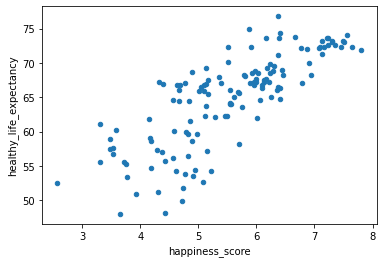

In [36]:
# Write your code here
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.